c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.1088 - loss: 2.3018 - val_accuracy: 0.1028 - val_loss: 2.2885 - learning_rate: 0.0010
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.1132 - loss: 2.3014 - val_accuracy: 0.2062 - val_loss: 2.2194 - learning_rate: 0.0010
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.1146 - loss: 2.3006 - val_accuracy: 0.4188 - val_loss: 1.8800 - learning_rate: 0.0010
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.1115 - loss: 2.2993 - val_accuracy: 0.4818 - val_loss: 1.6354 - learning_rate: 0.0010
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.1141 - loss: 2.2979 - val_accuracy: 0.4875 - val_loss: 1.4595 - learning_rate: 0.0010
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.1139 - loss: 2.2963 - val_accuracy: 0.5299 - val_loss: 1.5081 - learning_rate: 0.0010
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accura

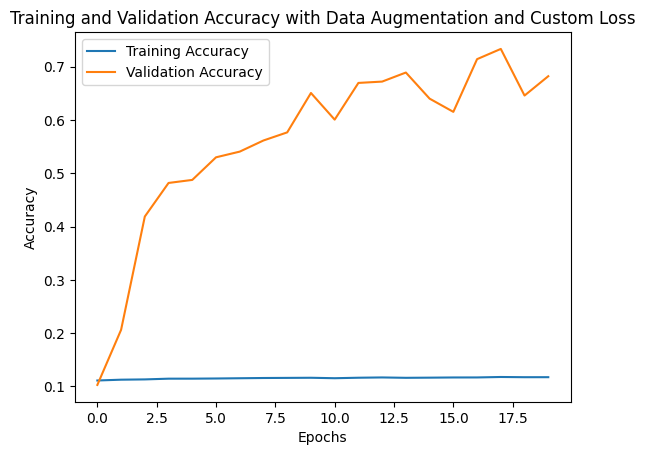

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,  # Increase rotation for more variation
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,  # Increase zoom range
    shear_range=0.3,  # Increase shear transformations
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],  # Random brightness adjustment
    channel_shift_range=0.1,  # Random channel shift for color change
    fill_mode='nearest'  # Fill in empty pixels after transformation
)
datagen.fit(train_images)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile model with custom loss function and ReduceLROnPlateau callback
model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

# Train model with augmented data and extended epochs
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    epochs=20,
                    validation_data=(test_images, test_labels),
                    callbacks=[reduce_lr])

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy with Data Augmentation and Custom Loss')
plt.show()
